# Python Lab 06: Percettroni Multi-Strato
## Francesco Della Santa, Matematica per l'Intelligenza Artificiale, Politecnico di Torino


I _Percettroni Multi-Strato_ (_Multi-Layer Perceptron_, **MLP**) sono l'esempio tipico di _Rete Neurale_ (_Neural Network_, **NN**).

## MLP in Breve

Gli MLP sono un particolare tipo di _feedforward_ NN (cioè senza ricorsività/cicli nella sua struttura) caratterizzato da una sequenza di _strati completamente connessi_ (_fully-connected layers_, **FC Layers**).

------------------------------
**"DEFINIZIONE"** _(Funzione caratterizzante un Fully-Connected Layer)_**:**

Sia $L$ un FC layer di $m\in\mathbb{N}$ unità con funzione di attivazione $\sigma:\mathbb{R}\rightarrow\mathbb{R}$ e sia $L$ (completamente) connesso con un altro livello di $n$ unità. Il layer $L$ è quindi caratterizzato dalla funzione $\mathcal{L}:\mathbb{R}^n\rightarrow\mathbb{R}^m$ tale che

\begin{equation}
\mathcal{L}(\boldsymbol{x}) := \boldsymbol{\sigma}\left(W\boldsymbol{x} + \boldsymbol{b}\right)\,,\quad \forall \ \boldsymbol{x}\in\mathbb{R}^n\,,
\end{equation}

dove:

- $W\in\mathbb{R}^{m\times n}$ è la matrice dei pesi del livello $L$;
- $\boldsymbol{b}\in\mathbb{R}^m$ è il vettore dei bias
- $\boldsymbol{\sigma}:\mathbb{R}^m\rightarrow\mathbb{R}^m$ è una funzione vettoriale che applica elemento-per-elemento la funzione $\sigma$.
------------------------------

------------------------------
**"DEFINIZIONE"** _(Input Layer)_**:**

Un _Input Layer_ di $n\in\mathbb{N}$ unità è un layer che "_legge_" vettori di $\mathbb{R}^n$ e li "_invia_" ai layer successivi con lui connessi.

------------------------------

-----------------

**"DEFINIZIONE"** _(Funzione caratterizzante un Multi-Layer Perceptron)_**:**

Sia dato un MLP costituito da un input layer $L^{(0)}$ di $n\in\mathbb{N}$ unità, seguito da una sequenza di FC layers $L^{(1)},\ldots ,L^{(H)}, L^{(H+1)}$ connessi uno dopo l'altro. In particolare, i layer $L^{(1)},\ldots ,L^{(H)}$ sono definiti _strati nascosti_ (_hidden layers_) mentre $L^{(H+1)}$ è definito _strato di output_ (_output layer_).

L'MLP in questione è quindi rappresentato da una funzione $\hat{\boldsymbol{F}}:\mathbb{R}^n\rightarrow \mathbb{R}^m$ tale che

\begin{equation}
\hat{\boldsymbol{F}}(\boldsymbol{x}) : \mathbb{R}^n \xrightarrow[]{\mathcal{L}^{(1)}} \mathbb{R}^{n_1} \xrightarrow[]{\mathcal{L}^{(2)}} \cdots \xrightarrow[]{\mathcal{L}^{(H)}} \mathbb{R}^{n_H}\xrightarrow[]{\mathcal{L}^{(H+1)}}\mathbb{R}^m
\end{equation}

e in particolare 

\begin{equation}
\hat{\boldsymbol{F}}(\boldsymbol{x}) = \boldsymbol{\sigma}^{(H+1)} \big( W^{(H+1)}\underbrace{\boldsymbol{\sigma}^{(H)}\big(\cdots \big( W^{(2)} \underbrace{\boldsymbol{\sigma}^{(1)}\left(W^{(1)}\boldsymbol{x} + \boldsymbol{b}^{(1)}\right)}_{\boldsymbol{x}^{(1)}} +\boldsymbol{b}^2\big) \cdots\big)}_{\boldsymbol{x}^{(H)}}  + \boldsymbol{b}^{(H+1)}\big)\,,\quad \forall \ \boldsymbol{x}\in\mathbb{R}^n\,,
\end{equation}

dove:
- $W^{(h)}$, $\boldsymbol{b}^{(h)}$, $\sigma^{(h)}$, sono rispettivamente i pesi, i bias e la funzione di attivazione del layer $h$-esimo, per ogni $h=1,\ldots , H+1$;
- $n_h\in\mathbb{N}$ è il numero di unità del layer $h$-esimo, per ogni $h=1,\ldots ,H$;
- $\boldsymbol{x}^{(h)}\in \mathbb{R}^{n_h}$ è l'output del layer $h$-esimo dato il vettore $\boldsymbol{x}\in\mathbb{R}^n$ come input della rete, per ogni $h=1,\ldots , H+1$;
- $m\in\mathbb{N}$ è il numero di unità dell'output layer $L^{(H+1)}$.


-----------------

-----------------

**OSSERVAZIONE** _($\hat{\boldsymbol{F}}$ come Funzione Parametrica)_**:** 

La funzione $\hat{\boldsymbol{F}}$ caratterizzante un MLP è, come le funzioni di tutti gli altri algoritmi di Machine Learning (ML), una funzione parametrica con parametri i pesi $W^{(h)}$ ed i bias $\boldsymbol{b}^{(h)}$. Indicando con $\boldsymbol{w}$ il vettore ottenuto dalla concatenazione delle vettorializzazioni di tutti i pesi $W^{(h)}$ e di tutti i bias $\boldsymbol{b}^{(h)}$, possiamo esplicitare la dipendenza dell'MLP da questi parametri con la seguente notazione:

\begin{equation}
\hat{\boldsymbol{F}}(\ \cdot \ \,;\, \boldsymbol{w})\quad \text{oppure} \quad \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\ \cdot \ )
\end{equation}

-----------------


## Metodi di Discesa del Gradiente


I metodi di discesa del gradiente sono _metodi numerici iterativi_ per la minimizzazione (massimizzazione) di funzioni $f:\mathbb{R}^n\rightarrow \mathbb{R}$. 

Le funzioni da minimizzare sono generalmente definite indifferentemente come "_funzioni obiettivo_" (_objective functions_), "_funzioni di costo_" (_cost functions_) o "_funzioni di perdita_" (_loss functions_).

Questi metodi si basano sull'osservazione che $-\nabla f(\boldsymbol{x}_0)$ è la _direzione di più ripida discesa_ per $f$ nel punto $\boldsymbol{x}_0$ (analogamente, $\nabla f(\boldsymbol{x}_0)$ è la direzione di più ripida ascesa).

------------------

**DEFINIZIONE** _(Direzione di Discesa)_**:**

Un vettore $\boldsymbol{p}\in\mathbb{R}^n$ è una _direzione di discesa_ per la funzione $f:\mathbb{R}^n\rightarrow\mathbb{R}$ in $\boldsymbol{x}_0\in\mathbb{R}^n$ se esiste $\alpha^*\in\mathbb{R}^+$ tale che

\begin{equation}
f(\boldsymbol{x}_0)\geq f(\boldsymbol{x}_0 + \alpha\boldsymbol{p})\,,\quad \forall \ \alpha\in [0, \alpha^*]
\end{equation}

------------------

------------------

**METODO** _(Steepest Descent - a grandi linee...)_**:**

Il _metodo di più ripida discesa_ (_steepest descent method_) è un metodo di discesa del gradiente per la minimizzazione di funzioni $f:\mathbb{R}^n\rightarrow\mathbb{R}$, cioè per trovare la soluzione al problema

\begin{equation}
\min_{\boldsymbol{x}\in\mathbb{R}^n} f(\boldsymbol{x})\,.
\end{equation}

Dato quindi un punto di partenza _arbitrario_ $\boldsymbol{x}_0\in\mathbb{R}^n$, abbiamo che il passo $k$-esimo del metodo è definito dalla seguente operazione:

\begin{equation}
\boldsymbol{x}_{k+1} = \boldsymbol{x}_{k} - \alpha_{k}\nabla f(\boldsymbol{x}_k)\,, \quad \forall \ k\geq 0\,,
\end{equation}

con $\alpha_k\in\mathbb{R}^+$ definito _passo di discesa_ (nei casi più semplici, $\alpha_k=\alpha$ costante per ogni $k$).


------------------

------------------

**LAVORARE CON IL METODO DI PIU' RIPIDA DISCESA** _(Proprietà e Problemi)_**:**

1. Sotto specifiche ipotesi di regolarità per $f$ e/o opportune scelte di $\boldsymbol{x}_0$ ed $\{\alpha_k\}_{k\in\mathbb{N}}$, il metodo _CONVERGE_ ad un minimo _LOCALE_ della funzione;

2. Se non si hanno informazioni sulle proprietà di $f$, la convergenza del metodo è altamente influenzata dalla scelta del punto di partenza $\boldsymbol{x}_0$ e dalla successione $\{\alpha_k\}_{k\in\mathbb{N}}$ di moltiplicatori del passo. Il metodo potrebbe quindi CONVERGERE, DIVERGERE, "OSCILLLARE";

3. Vanno stabiliti opportuni criteri di arresto (altrimenti il metodo contrinuerebbe all'infinito). Anche i parametri caratterizzanti i criteri di arresto influenzano la convergenza del metodo.

------------------



## Addestramento di un MLP - in Breve

L'addestramento di un MLP (e di una NN in generale) richiede sia conoscenze teoriche dei metodi di ottimizzazione numerica che una certa sensibilità pratica/empirica per la scelta dei parametri che li caratterizzano. 

------------------
**ATTENZIONE** _(Aggiunta di una Componente Stocastica)_**:** 

Si deve inoltre considerare che l'addestramento di NN introduce delle componenti _stocastiche_ nei metodi numerici sopra citati. In altre parole, non si minimizza una generica funzione di costo "_fissata_", ma una funzione di costo caratterizzata dai campioni del mio dataset che uso per l'addestramento.

------------------

### Funzioni di Loss Rispetto a "Gruppi" di Dati


Data una funzione target $\boldsymbol{F}$, per addestrare un MLP con funzione parametrica $\hat{\boldsymbol{F}}_\boldsymbol{w}$ ad apprendere $\boldsymbol{F}$, vorremmo _idealmente_ risolvere il problema

\begin{equation}
\min_{\boldsymbol{w}} \left\lbrace \mathrm{Loss}(\boldsymbol{w}):= \sum_{\boldsymbol{x}\in\mathbb{R}^n}\mathrm{Errore}\left(\boldsymbol{F}(\boldsymbol{x}), \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\boldsymbol{x})\right)\right\rbrace\,;
\end{equation}
in altre parole, vorremmo trovare $\boldsymbol{w}^*$ tale che $\mathrm{Loss}(\boldsymbol{w}^*)=0$.

**ATTENZIONE:** NOTARE CHE NEL PROBLEMA DI MINIMO LE VARIABILI SONO I PARAMETRI $\boldsymbol{w}$, NON LE $\boldsymbol{x}$!!

Ovviamente, non disponendo degli infiniti punti $\boldsymbol{x}\in\mathbb{R}^n$ (e spesso neanche della funzione target $\boldsymbol{F}$, ma solo delle valutazioni $\boldsymbol{y}=\boldsymbol{F}(\boldsymbol{x})$), il problema ideale sopra indicato va ri-adattato alla pratica, cioè ai dati disponibili contenuti nel training set

\begin{equation}
\mathcal{T}=\{ (\boldsymbol{x}_1,\boldsymbol{y}_1),\ldots ,  (\boldsymbol{x}_T,\boldsymbol{y}_T) \}\,.
\end{equation}


#### Approccio 1: Niente Stocasticità

L'idea più semplice per addestrare un MLP può essere quindi quello di definire una funzione di loss "troncando" quella del problema ideale, cioè:

\begin{equation}
\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\sum_{i=1}^T \underbrace{\mathrm{Errore}\left(\boldsymbol{y}_i, \hat{\boldsymbol{F}}(\boldsymbol{x}_i)\right) }_{\text{err. el.-per-el.}} \,.
\end{equation}

In questo caso, il problema di minimizzazione vede una loss "fissata" e può essere risolto tramite il metodo di più ripida discesa (o sue varianti); avremo quindi che l'addestramento del mio MLP sarà così definito:

-------------------
**SCHEMA** _(Addestramento - Approccio 1)_**:**

L'algoritmo di addestramento per questo approccio è esemplificato dai seguenti passi:

1. **Inizializzazione Pesi:** genero dei pesi $\boldsymbol{w}$ e li assegno all'architettura del mio MLP (ottengo quindi $\hat{\boldsymbol{F}}_{\boldsymbol{w}}$);
2. **Finché** non viene raggiunto un criterio di arresto (vedremo in seguito), ripetere:
    1. **Aggiornamento Pesi:** $\boldsymbol{w}\gets \boldsymbol{w} - \alpha \nabla \mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w})$;


**Definizione:** ogni ripetizione dei passi del punto (2) è definito _EPOCA DI ADDESTRAMENTO_, nella terminologia delle NN. Il più semplice dei criteri di arresto è quindi quello di inserire un numero massimo di epoche da eseguire.


**Definizione:** il parametro $\alpha$, nella terminologia delle NN, è definito _tasso di apprendimento_ (_learning rate_). Anche se non esplicito nella notazione utilizzata sopra, $\alpha$ può variare da epoca ad epoca. 

  
----------------------


#### Approccio 2: Stocasticità "Pura"

Poiché addestrare l'MLP rispetto ad un errore "aggregato" rispetto a tutto il training set potrebbe dare risultati poco sensibili ai dettagli della funzione target $\boldsymbol{F}$, l'idea è quella di introdurre della stocasticità nel metodo di ottimizzazione (prendiamo come riferimento sempre la _steepest descent_).

Definiamo quindi una funzione di loss "_parametrica_", i cui parametri sono una singola coppia di $\mathcal{T}$, cioè:

\begin{equation}
\mathrm{Loss}_{(\boldsymbol{x},\boldsymbol{y})}(\boldsymbol{w}):= \mathrm{Errore}\left(\boldsymbol{y}, \hat{\boldsymbol{F}}(\boldsymbol{x})\right) \,;
\end{equation}

Data questa loss, il metodo cambia "spezzando" il passo (A) dell'_Approccio 1_ in tanti sottopassi, uno per ogni coppia in $\mathcal{T}$

In questo caso, il problema di minimizzazione vede una loss "variabile"; avremo quindi che l'addestramento del mio MLP sarà così definito:

-------------------
**SCHEMA** _(Addestramento - Approccio 2)_**:**

L'algoritmo di addestramento per questo approccio è esemplificato dai seguenti passi:

1. **Inizializzazione Pesi:** genero dei pesi $\boldsymbol{w}$ e li assegno all'architettura del mio MLP (ottengo quindi $\hat{\boldsymbol{F}}_{\boldsymbol{w}}$);
2. **Finché** non viene raggiunto un criterio di arresto (vedremo in seguito), ripetere:
    1. **"Mescolo" le coppie in** $\mathcal{T}$;
    2. **Per ogni** $(\boldsymbol{x}, \boldsymbol{y})$ in $\mathcal{T}$ "mescolato":
        1. **Aggiornamento Pesi:** $\boldsymbol{w}\gets \boldsymbol{w} - \alpha \nabla \mathrm{Loss}_{(\boldsymbol{x},\boldsymbol{y})}(\boldsymbol{w})$;
    
**N.B.:** analogamente all'_Approccio 1_, è definita _EPOCA DI ADDESTRAMENTO_ ogni ripetizione completa dei sottopassi del punto (2).


----------------------


#### Approccio 3: Metodi Mini-Batch

L'approccio di fatto più utilizzato nella pratica è una via di mezzo tra il primo ed il terzo (ed in realtà i primi due approcci sono casi particolari di questo).

Continuiamo a definire una funzione di loss "_parametrica_", i cui parametri non sono una singola coppia di $\mathcal{T}$, ma un suo arbitrario sottoinsieme $\mathcal{B}$ (chiamato _mini-batch_), cioè:

\begin{equation}
\mathrm{Loss}_{\,\mathcal{B}}(\boldsymbol{w}):= \sum_{(\boldsymbol{x}, \boldsymbol{y})\in\mathcal{B}} \mathrm{Errore}\left(\boldsymbol{y}, \hat{\boldsymbol{F}}(\boldsymbol{x})\right) \,;
\end{equation}

Data questa loss, il metodo cambia "spezzando" il passo (A) dell'_Approccio 1_ in tanti sottopassi, analogamente all'_Approccio 2_, uno per ogni sottoinsieme $\mathcal{B}$ estratto.

In questo caso, il problema di minimizzazione vede una loss "variabile"; avremo quindi che l'addestramento del mio MLP sarà così definito:

-------------------
**SCHEMA** _(Addestramento - Approccio 3)_**:**

Fissato un numero $K\in\mathbb{N}$ di minibatch in cui "spezzare" $\mathcal{T}$ (generalmente si fa secondo una cardinalità comune dei minibatch), l'algoritmo di addestramento per questo approccio è esemplificato dai seguenti passi:

1. **Inizializzazione Pesi:** genero dei pesi $\boldsymbol{w}$ e li assegno all'architettura del mio MLP (ottengo quindi $\hat{\boldsymbol{F}}_{\boldsymbol{w}}$);
2. **Finché** non viene raggiunto un criterio di arresto (vedremo in seguito), ripetere:
    1. **Genero Casualmente** una $K$-partizione in mini-batch _distinti_ $\mathcal{B}_1,\ldots , \mathcal{B}_K$ di $\mathcal{T}$;
    2. **Per ogni** $k=1,\ldots , K$:
        1. **Aggiornamento Pesi:** $\boldsymbol{w}\gets \boldsymbol{w} - \alpha \nabla \mathrm{Loss}_{\,\mathcal{B}_k}(\boldsymbol{w})$;



**N.B.:** analogamente all'_Approccio 2_, è definita _EPOCA DI ADDESTRAMENTO_ ogni ripetizione completa dei sottopassi del punto (2).

  
----------------------


#### Loss Notevoli

A seconda della funzione $\boldsymbol{F}$ da apprendere, la loss su $\mathcal{T}$, $(\boldsymbol{x}, \boldsymbol{y})$ o $\mathcal{B}$ può anche essere definita in maniera differente, scegliendo un _errore elemento-per-elemento_ o un _aggregatore_ differenti. Alcune loss di esempio (formule scritte solo per il caso $\mathrm{Loss}_{\,\mathcal{T}}$) sono:
1. _Media di Errori Quadratici_ (_Mean Square Error_, **MSE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\frac{1}{T}\sum_{i=1}^{T} \left(\boldsymbol{y}_i - \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\boldsymbol{x}_i) \right)^2$;
2. _Media di Errori Assoluti_ (_Mean Absolute Error_, **MAE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):=\frac{1}{T}\sum_{i=1}^{T} | \boldsymbol{y}_i - \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\boldsymbol{x}_i) |$;
3. _Somma di Errori Quadratici_ (_Sum of Square Error_, **SSE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):= \sum_{i=1}^{T} \left(\boldsymbol{y}_i - \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\boldsymbol{x}_i) \right)^2$;
4. _Somma di Errori Assoluti_ (_Sum of Absolute Error_, **SAE**): $\mathrm{Loss}_{\,\mathcal{T}}(\boldsymbol{w}):= \sum_{i=1}^{T} | \boldsymbol{y}_i - \hat{\boldsymbol{F}}_{\boldsymbol{w}}(\boldsymbol{x}_i) |$.

**N.B.:** Le loss sopra indicate sono utili per problemi di _regressione_ e per la spiegazione della teoria. In particolare si preferisce usare le loss _quadratiche_ (MSE ed SSE) invece di quelle con valore assoluto per motivi di calcolo del gradiente; le loss con valore assoluto si prediligono invece per la valutazione del modello addestrato, in quanto più facili da interpretare e poiché non è richiesta una loro differenziazione.

**N.B.:** Per problemi di classificazione si utilizza generalmente altre loss (p.e. la _cross-entropy loss_) e/o particolari output layer (_softmax layers_). Non li tratteremo per concentrarci sulle proprietà generali dell'addestramento.


## Criteri di Arresto

Come anticipato nelle scorse esercitazioni, per le NN il validation set $\mathcal{V}$ svolge un ruolo generalmente differente rispetto ai classici algoritmi di ML.

Per capire meglio, bisogna richiamare due fenomeni che possono avvenire in caso di _cattivo addestramento_ della NN:
1. **Underfitting:** la NN si è addestrata male su $\mathcal{T}$ ed ha quindi cattive performance sia su di esso che sul test set $\mathcal{P}$.
2. **Overfitting:** la NN si è addestrata "_troppo_" su $\mathcal{T}$. Ha quindi imparato molto bene ad associare le $\boldsymbol{x}$ di $\mathcal{T}$ alle corrispondenti $\boldsymbol{y}$, ma al prezzo di non essere capace di fare altrettanto con delle $\boldsymbol{x}$ "nuove". La NN ha quindi buone performance su $\mathcal{T}$ e cattive su $\mathcal{P}$.

Il validation set $\mathcal{V}$, nelle NN, viene generalmente utilizzato per monitorare le ipotetiche performance del modello su $\mathcal{P}$.

I criteri di arresto principali (e più semplici) per l'addestramento di una NN sono quindi i seguenti:
1. Fissare un numero massimo $e_{\max}\in\mathbb{N}$ di epoche da eseguire;
2. Fissare una numero massimo $p\in\mathbb{N}$ di epoche di tolleranza rispetto al quale posso accettare che la loss su $\mathcal{V}$ cresca invece di diminuire. Oltre a ridurre i tempi di addestramento, questo criterio serve ad impedire di addestrare eccessivamente il modello e così rischiare di cadere in **overfitting**.

---------------

**OSSERVAZIONE** _(Ottimizzazione "Classica" e di NN)_**:**

Mentre nei problemi di minimizzazione classici l'obiettivo è trovare $\boldsymbol{x}^*$ che minimizzi globalmente (o al peggio localmente) una funzione _valutabile_, le NN sono invece tipicamente utilizzate per "apprendere" funzioni $\boldsymbol{F}$ ignote o _difficilmente/onerosamente valutabili_ che caratterizzano le associazioni input-output di un numero limitato di campioni noti.

La difficoltà sta quindi nel voler minimizzare l'errore sul test set (rappresentante dati "nuovi" ed "ignoti"), attraverso una procedura che sfrutta _altri_ dati (quelli del training set). Questo approccio, dettato dalla necessità, è il motivo alla base del fenomeno di overfitting e spiega la natura euristica/empirica di alcuni metodi di ottimizzazione utilizzati per addestrare le NN. Infatti, non necessariamente un minimo globale/locale per la loss su $\mathcal{T}$ si traduce in una loss altrettanto bassa per $\mathcal{V}$ e $\mathcal{P}$. 

--------------

## MLP e Applicazioni


Gli MLP, ed in generale le NN caratterizzate da soli FC layer, sono principalmente utilizzate per problemi di regressione/classificazione con input vettoriali non eccessivamente grandi (indicativamente $\mathbb{R}^n$ con $n$ dell'ordine delle centinaia).

Per problemi di grandi dimensioni un FC layer inizia a risultare oneroso in termini di memoria. Infatti, considerando un FC layer con stesso numero di unità $n$ del layer precedente, il numero di parametri da ottimizzare per solo questo layer è pari a $n^2 + n$.

Per questo motivo gli MLP non sono mai eccessivamente profondi né hanno troppe unità per livello.

Una particolare famiglia di layer utile ad aggirare queste difficoltà è quella dei _Convolutional Layers_, utilizzati soprattutto nell'ambito della computer vision, dove la vettorializzazione di immagini significherebbe vettori con milioni di elementi.



# Esercitazione: MLP in Scikit-Learn


In questa esercitazione applicheremo la classe _MLPClassifier_ di scikit-learn (https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) al problema di classificazione di volti affrontato in precedenza con le SVM.

Dato il non trascurabile numero di pixel per le immagini (per quanto a bassa risoluzione), applicheremo l'MLP a dei dati trasformati tramite PCA.

**ATTENZIONE:** per dettagli sul dataset utilizzato, guardare le precedenti esercitazioni


In [1]:
# ***** NOTA BENE! *****
# perché %matplotlib widget funzioni, installare nell'ambiente virtuale 
# il pacchetto ipympl con il comando:
# pip install ipympl
#
# ATTENZIONE: perché funzioni è necessario chiudere e rilanciare jupyter-lab
#
# STILE DI VISUALIZZAZIONE PLOT FATTI CON MATPLOTLIB
%matplotlib widget
#
#
import pandas as pd
import numpy as np
from sklearn import datasets
import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, make_scorer
from IPython.display import display

# Il codice presente di seguito serve nel caso si verifichi un errore del tipo
#
# "URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1124)>"
#
# al momento di chiamare la funzione fetch_lfw_people di sklearn.datasets
#
# ATTENZIONE: il codice di seguito non è quindi sempre necessario; se non lo fosse, commentarlo pure.
#

import os, ssl

if (not os.environ.get('PYTHONHTTPSVERIFY', '') and getattr(ssl, '_create_unverified_context', None)):
    ssl._create_default_https_context = ssl._create_unverified_context

## Importazione del Dataset e Creazione di Training, Validation e Test set

Importiamo il dataset $\mathcal{D}$ da scikit-learn e dividiamolo in $\mathcal{T}$, $\mathcal{V}$ e $\mathcal{P}$. Utilizzare le seguenti percentuali:
1. $|\mathcal{T}| = 40\% |\mathcal{D}|$
1. $|\mathcal{V}| = 10\% |\mathcal{D}|$
1. $|\mathcal{P}| = 50\% |\mathcal{D}|$

**ATTENZIONE:** visto che la classe MLPClassifier lo esegue in automatico, _NON_ sarà necessario trasformare le classi secondo la codifica del one-hot encoding.

**ESERCIZIO:** completare il codice nella cella seguente.

In [3]:
lfw_people = datasets.fetch_lfw_people(min_faces_per_person=70, resize=0.4)

face_data = lfw_people['data']
face_images = lfw_people['images']
face_tnames = lfw_people['target_names']
face_targets = lfw_people['target']

# Creare gli X_trainval, y_trainval, X_test, y_test
# (RICORDA: il validation set viene creato "internamente" dalla classe MLPClassifier. 
# Gli deve essere solamente specificata la percentuale rispetto al training set)

random_state = 42
np.random.seed(random_state)

test_p = 0.5 
val_p = 0.2   # Percentuale di dati di X_trainval da usare come validation set

X_trainval, X_test, y_trainval, y_test = train_test_split(face_data, face_targets, test_size=test_p, 
                                                          random_state=random_state, shuffle=True)

display(pd.DataFrame({'X_trainval': X_trainval.shape, 'X_test': X_test.shape}, index=['N. sanmples', 'N.features']))

,X_trainval,X_test
N. sanmples,644,644
N.features,1850,1850


### PCA sul Training e Validation Set

Prepariamo una PCA rispetto ai dati di *X_trainval*. Non considerimo quelli di *X_test* poiché rappresentano ipotetici dati non a disposizione.

Selezionare un numero di PC che spieghino il $98\%$ della varianza totale dei dati.

**NOTA:** A voler essere precisi, ancora meglio sarebbe stato preparare la PCA solo sui dati di training, escludendo quelli di validation. Tuttavia (per quanto risulta dalla documentazione) la classe _MLPClassifier_ accetta solamente la frazione di training da usare come validation, non direttamente dei dati. 


In [4]:
# Preparazione PCA

pca = PCA(0.98) 

pca.fit(X_trainval)

display(pd.DataFrame({'Numero PC': pca.n_components_, 
                      '% Varianza Tot. Spiegata': pca.explained_variance_ratio_.sum()}, 
                     index=['X_trainval']))

# Trasformazione dati. Salvare i vecchi in "copie di backup"

X_trainval_old = X_trainval.copy()
# X_trainval = ... <-- COMPLETARE!

X_test_old = X_test.copy()
# X_test = ... <-- COMPLETARE!

,Numero PC,% Varianza Tot. Spiegata
X_trainval,239,0.980054


### Costruzione e Addestramento MLP

Costruiamo un MLP caratterizzato da 5 hidden layers con 256 unità ognuno e funzione di attivazione _relu_.

Come parametri di addestramento, si utilizzino quelli qui indicati:
1. **Batch size**: 8;
2. **Massimo numero di epoche**: 5000;
3. **Early stopping**: pazienza di 75 epoche.


In [6]:
# Inizializzazione iper-parametri MLP
hidden_layer_sizes = [256] * 5
activation = 'relu'
patience = 75 
max_epochs = 5000
verbose = False
batch_sz = 8

# Inizializzazione MLP
mlp = MLPClassifier(hidden_layer_sizes=hidden_layer_sizes,
                    activation=activation,
                    early_stopping=True,
                    n_iter_no_change=patience,
                    max_iter=max_epochs,
                    validation_fraction=val_p, 
                    batch_size=batch_sz,
                    verbose=verbose,
                    random_state=random_state,
                    solver='adam'
                   )

In [ ]:
# Addestramento MLP
mlp.fit(X_trainval,y_trainval) 

In [ ]:
# Performance

y_pred_trainval = mlp.predict(X_trainval)
y_pred = mlp.predict(X_test)

acc_trainval = mlp.score(X_trainval, y_trainval)
prec_trainval = precision_score(y_trainval, y_pred_trainval, average='weighted')
rec_trainval = recall_score(y_trainval, y_pred_trainval, average='weighted')
f1_trainval = f1_score(y_trainval, y_pred_trainval, average='weighted')

acc = mlp.score(X_test, y_test)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

df_perf = pd.DataFrame({'Accuracy': [acc_trainval, acc], 
                        'Precision': [prec_trainval, prec], 
                        'Recall': [rec_trainval, rec],
                        'F1': [f1_trainval, f1]
                       },
                      index=['train. + val.', 'test'])

cmat = confusion_matrix(y_test, y_pred, labels=mlp.classes_)
cmat_norm_true = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='true')
cmat_norm_pred = confusion_matrix(y_test, y_pred, labels=mlp.classes_, normalize='pred')

df_cmat = pd.DataFrame(cmat, columns=face_tnames, index=face_tnames)
df_cmat_norm_true = pd.DataFrame(cmat_norm_true, columns=face_tnames, index=face_tnames)
df_cmat_norm_pred = pd.DataFrame(cmat_norm_pred, columns=face_tnames, index=face_tnames)

display(df_perf)
display(df_cmat)
display(df_cmat_norm_true)
display(df_cmat_norm_pred)

## Alcuni Esempi Visivi

Mostriamo visivamente come viene fatta la classificazione multi-classe. 

**RICORDA:** la classe MLPClassifier ha un metodo _predict_proba_ che restituisce le probabilità di appartenenza di un input ad ognuna delle classi. Quella con probabilità massima è poi quella predetta in output.

In [ ]:
# Abbreviazione nomi per etichette in barplot
face_tnames_short = []
for name in face_tnames:
    name_split = name.split(' ')
    nm = ''
    for word in name_split:
        nm = nm + word[0]
    face_tnames_short.append(nm)

# Selezione di "n_randsamples" volti random dal dataset

n_randsamples = 25
ind_test_rand = np.random.choice(len(y_test), n_randsamples, replace=False)

# Matrice delle n_randsamples volti scelti (una riga, un volto)
rand_faces = X_test_old[ind_test_rand, :]
rand_faces_pca = X_test[ind_test_rand, :]
rand_targets = y_test[ind_test_rand]

# Decision Function per i volti random:
rand_faces_decision = mlp.predict_proba(rand_faces_pca)
y_pred_rand_faces = mlp.predict(rand_faces_pca)

for i in range(n_randsamples):
    fig, axs = plt.subplots(1, 2, figsize=(8, 3))
    face_i = rand_faces[i, :].reshape(50, 37)
    
    axs[0].imshow(face_i, cmap=plt.cm.gray)
    axs[0].set_title('Volto test {} ({})'.format(ind_test_rand[i], face_tnames[rand_targets[i]]))
    
    axs[1].bar(np.arange(len(face_tnames)),
               rand_faces_decision[i, :]
              )
    axs[1].grid()
    axs[1].set_xticks(np.arange(len(face_tnames)))
    axs[1].set_xticklabels(face_tnames_short,
                           rotation=15,
                           fontsize=12
                          )
    axs[1].set_title('Predizione: {}'.format(face_tnames[y_pred_rand_faces[i]]))
    
plt.show()

## "Bilanciamento" del Training (+ Validation) Set

Ingrandiamo virtualmente il dataset riflettendo le immagini rispetto al proprio asse verticale (vedi https://numpy.org/doc/stable/reference/generated/numpy.flip.html).

Dopodiché, cerchiamo di costruire un "training + validation" set "bilanciato" cioè con una presenza equivalente delle varie classi. Per fare ciò esistono differenti approcci, noi opteremo per il seguente:
1. Calcoliamo il numero $N_{\min}$ di immagini della classe meno frequente nel dataset (esteso)
2. Creiamo il training + validation set prendendo casualmente $N_{\min}/2$ campioni da ogni classe.

Per questo nuovo caso, considereremo un validation set con cardinalità pari al 10% dei dati usati in addestramento, cioè $|\mathcal{V}| = 10\% (|\mathcal{T}| + |\mathcal{V}|)$.

In [ ]:
# Creazione dataset "esteso"

face_images_flip = lfw_people['images'].copy()
face_data_flip = lfw_people['data'].copy()
face_targets_flip = face_targets.copy()

for i in range(face_images_flip.shape[0]):
    # face_images_flip[i] = np.flip(...) <-- COMPLETARE!  # riflessione immagine risp. asse verticale
    # face_data_flip[i] = ... <-- COMPLETARE!  # vettorializzazione immagine specchiata (p.e., usare metodo "flatten")
    
face_images_ext = np.concatenate([face_images, face_images_flip], axis=0)
face_data_ext = np.concatenate([face_data, face_data_flip], axis=0)
face_targets_ext = np.concatenate([face_targets, face_targets_flip], axis=0)


# DataFrame delle classi di appartenenza e dei nomi (dataset esteso)
face_targets_ext_df = pd.DataFrame({'target': face_targets_ext, 'target_names': [face_tnames[t] for t in face_targets_ext]})
face_counts_ext = face_targets_ext_df['target_names'].value_counts()

Nmin = face_counts_ext.min()
name_Nmin = face_counts_ext.index[face_counts_ext.argmin()]
target_Nmin = list(face_tnames).index(name_Nmin)

display(pd.DataFrame({'name': face_counts_ext.index, 
                      'target': [list(face_tnames).index(name) for name in face_counts_ext.index], 
                      'counts':face_counts_ext.values}
                    )
       )

display(pd.DataFrame({'N_min': Nmin, 'name': name_Nmin, 'target': target_Nmin}, index=[0]))

# Creazione nuovo training + validation set (per semplicità, tralasciamo l'array con le immagini)

Nmin_half = int(np.round(Nmin * 0.5))

indsX_trainval_ext_list = []
indsX_test_ext_list = []

for t in range(len(face_tnames)):
    indsX_ext_t = np.argwhere(face_targets_ext == t).flatten()  # indici corrispondenti a immagini con target t
    
    indsX_trainval_ext_t, indsX_test_ext_t = train_test_split(indsX_ext_t, 
                                                              train_size=Nmin_half,
                                                              random_state=random_state, 
                                                              shuffle=True)
    
    indsX_trainval_ext_list.append(indsX_trainval_ext_t)
    indsX_test_ext_list.append(indsX_test_ext_t)

indsX_trainval_ext = np.concatenate(indsX_trainval_ext_list, axis=0)
indsX_test_ext = np.concatenate(indsX_test_ext_list, axis=0)

# Mescoliamo (giusto per sicurezza) gli indici
np.random.shuffle(indsX_trainval_ext)
np.random.shuffle(indsX_test_ext)

X_trainval_ext = face_data_ext[indsX_trainval_ext, :]
y_trainval_ext = face_targets_ext[indsX_trainval_ext]

X_test_ext = face_data_ext[indsX_test_ext, :]
y_test_ext = face_targets_ext[indsX_test_ext]

display(pd.DataFrame({'trainval_ext_size': len(y_trainval_ext), 'test_ext_size': len(y_test_ext)}, index=[0]))

### Nuovo Addestramento e Analisi delle Nuove Performance

Di seguito ripetiamo quanto già fatto in precedenza, ma rispetto al nuovo dataset "esteso e con training + validation set bilanciato".

In [ ]:
# Preparazione PCA

# pca_ext = PCA(...) <-- COMPLETARE!

# pca_ext.fit(...) <-- COMPLETARE!

display(pd.DataFrame({'Numero PC': pca_ext.n_components_, 
                      '% Varianza Tot. Spiegata': pca_ext.explained_variance_ratio_.sum()}, 
                     index=['X_trainval_ext']))

# Trasformazione dati. Salvare i vecchi in "copie di backup"

X_trainval_ext_old = X_trainval_ext.copy()
# X_trainval_ext = pca_ext.transform(...) <-- COMPLETARE!

X_test_ext_old = X_test_ext.copy()
# X_test_ext = pca_ext.transform(...) <-- COMPLETARE!

### Costruzione e Addestramento MLP

Costruiamo un MLP caratterizzato da 5 hidden layers con 256 unità ognuno e funzione di attivazione _relu_.

Come parametri di addestramento, si utilizzino quelli qui indicati:
1. **Batch size**: 8;
2. **Massimo numero di epoche**: 5000;
3. **Early stopping**: pazienza di 75 epoche.


In [10]:
# Inizializzazione iper-parametri MLP
# ... <-- COMPLETARE!

# Inizializzazione MLP
# mlp_ext = MLPClassifier(...) <-- COMPLETARE!

In [11]:
# Addestramento MLP
# mlp_ext.fit(...) <-- COMPLETARE!

MLPClassifier(batch_size=8, early_stopping=True,
              hidden_layer_sizes=[256, 256, 256, 256, 256], max_iter=5000,
              n_iter_no_change=75, random_state=42)

In [12]:
# Performance

# ... <-- COMPLETARE!


,Accuracy,Precision,Recall,F1
train. + val.,0.955734,0.957512,0.955734,0.95581
test,0.604137,0.691269,0.604137,0.62969


,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Tony Blair
Ariel Sharon,56,8,5,7,7,0,0
Colin Powell,61,213,18,46,40,12,11
Donald Rumsfeld,34,5,73,32,22,1,4
George W Bush,116,25,49,691,48,29,31
Gerhard Schroeder,8,3,12,25,80,8,11
Hugo Chavez,3,0,1,5,10,50,2
Tony Blair,9,10,15,33,40,17,93


,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Tony Blair
Ariel Sharon,0.674699,0.096386,0.060241,0.084337,0.084337,0.000000,0.000000
Colin Powell,0.152120,0.531172,0.044888,0.114713,0.099751,0.029925,0.027431
Donald Rumsfeld,0.198830,0.029240,0.426901,0.187135,0.128655,0.005848,0.023392
George W Bush,0.117290,0.025278,0.049545,0.698686,0.048534,0.029323,0.031345
Gerhard Schroeder,0.054422,0.020408,0.081633,0.170068,0.544218,0.054422,0.074830
Hugo Chavez,0.042254,0.000000,0.014085,0.070423,0.140845,0.704225,0.028169
Tony Blair,0.041475,0.046083,0.069124,0.152074,0.184332,0.078341,0.428571


,Ariel Sharon,Colin Powell,Donald Rumsfeld,George W Bush,Gerhard Schroeder,Hugo Chavez,Tony Blair
Ariel Sharon,0.195122,0.030303,0.028902,0.008343,0.028340,0.000000,0.000000
Colin Powell,0.212544,0.806818,0.104046,0.054827,0.161943,0.102564,0.072368
Donald Rumsfeld,0.118467,0.018939,0.421965,0.038141,0.089069,0.008547,0.026316
George W Bush,0.404181,0.094697,0.283237,0.823600,0.194332,0.247863,0.203947
Gerhard Schroeder,0.027875,0.011364,0.069364,0.029797,0.323887,0.068376,0.072368
Hugo Chavez,0.010453,0.000000,0.005780,0.005959,0.040486,0.427350,0.013158
Tony Blair,0.031359,0.037879,0.086705,0.039333,0.161943,0.145299,0.611842


## Alcuni Esempi Visivi

Mostriamo visivamente come viene fatta la classificazione multi-classe. 

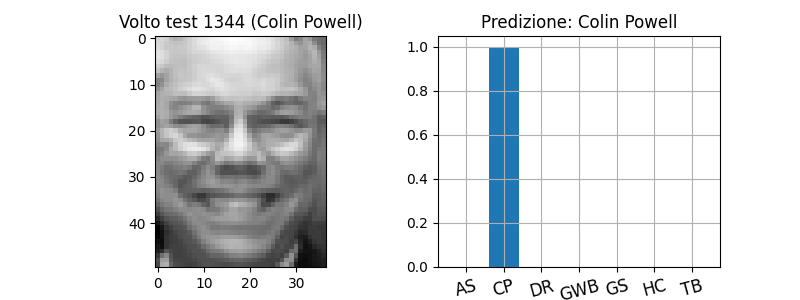

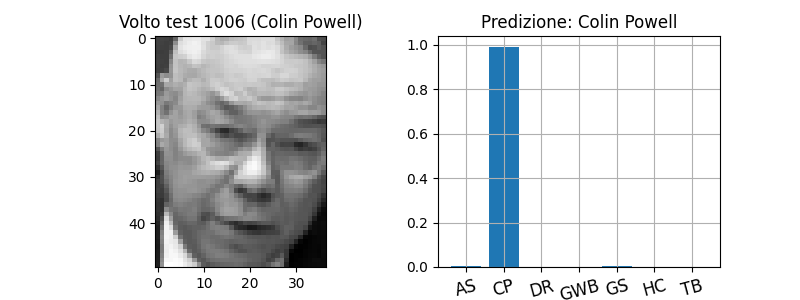

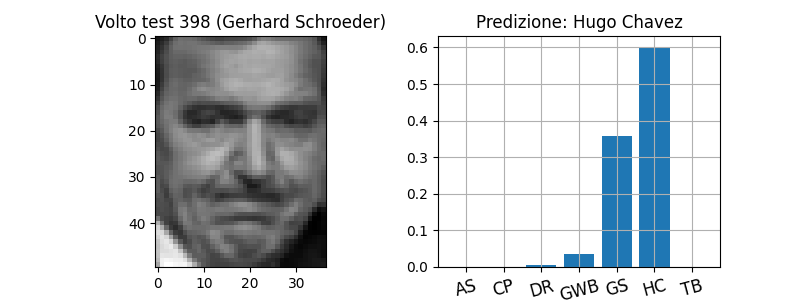

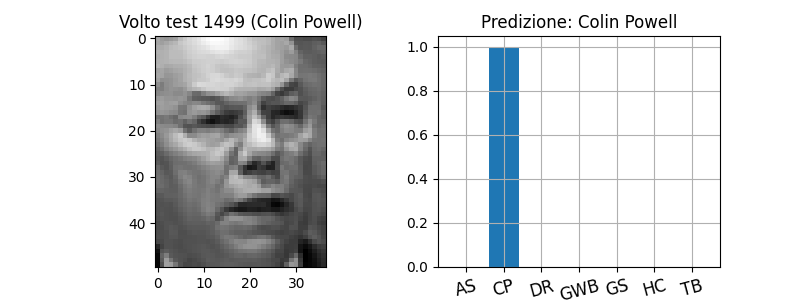

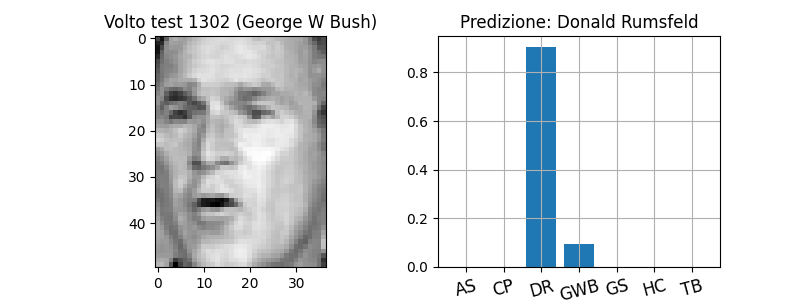

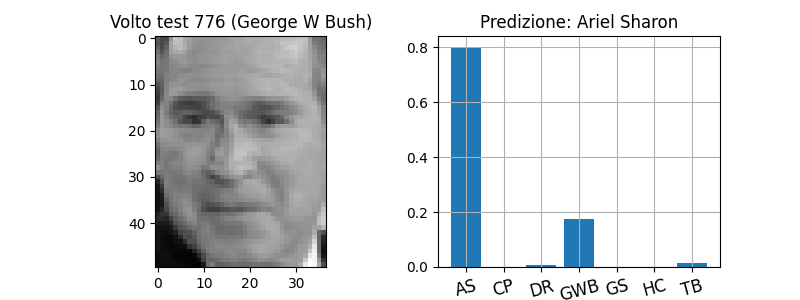

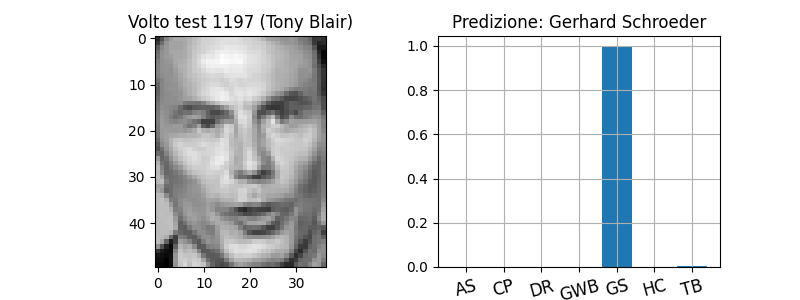

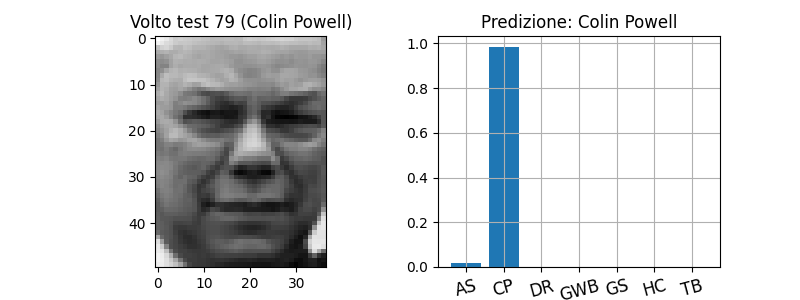

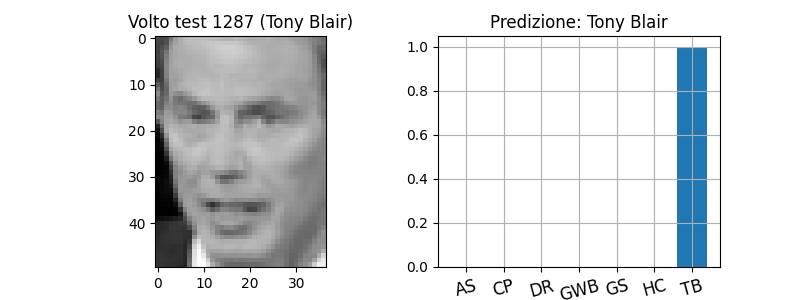

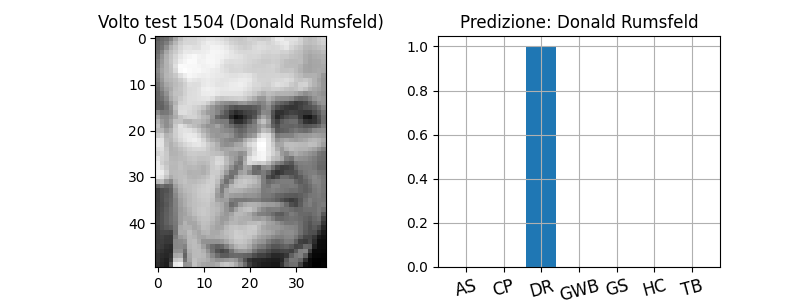

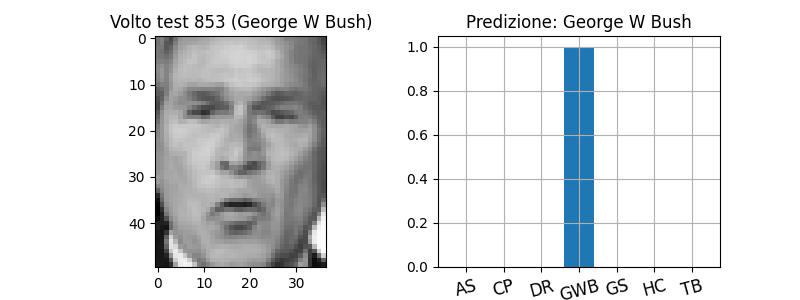

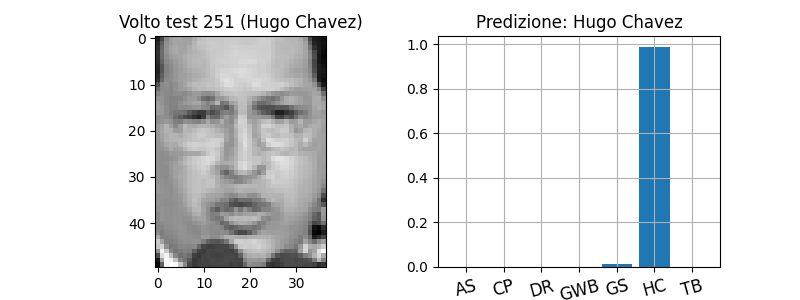

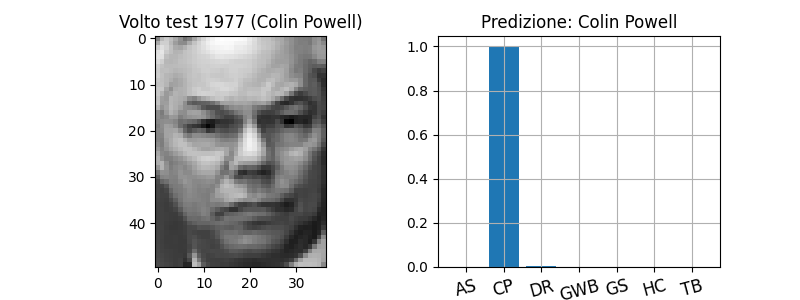

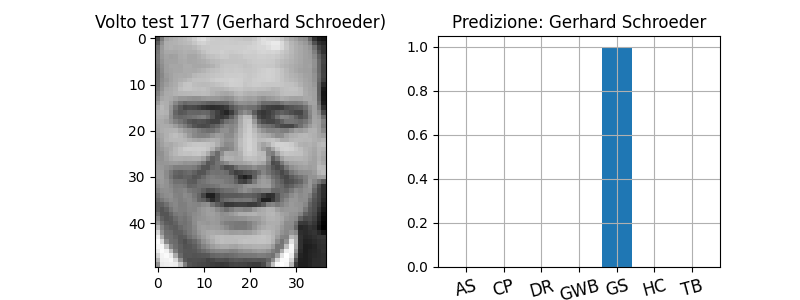

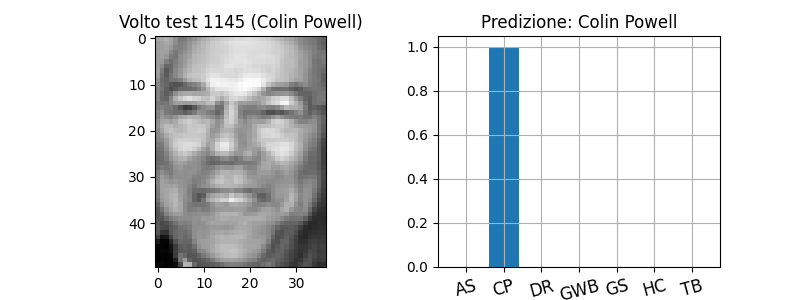

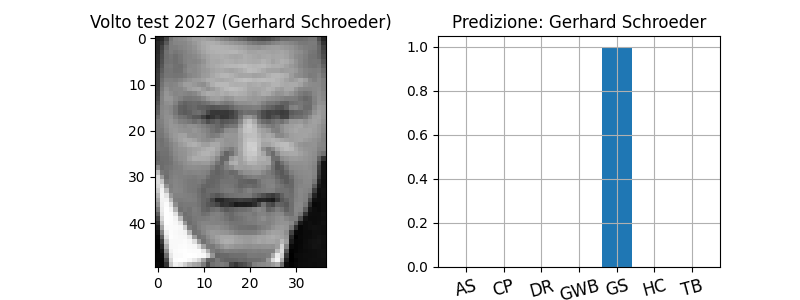

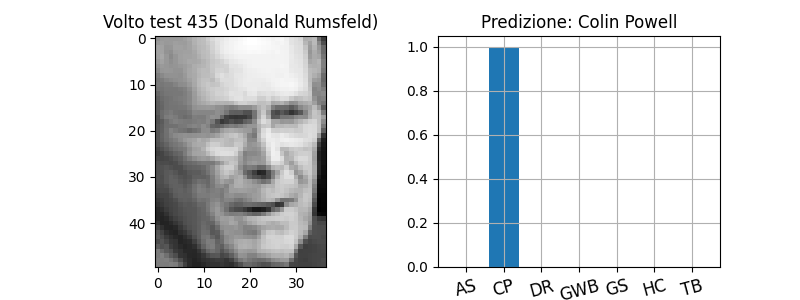

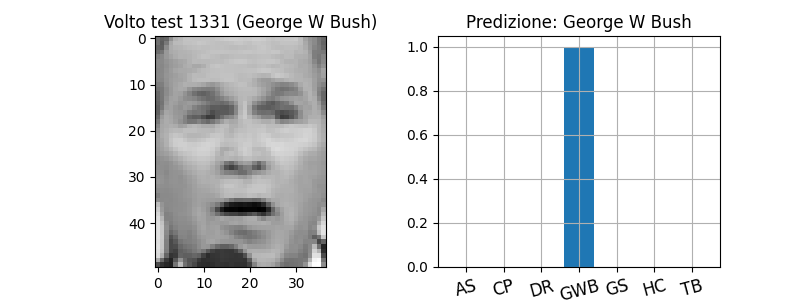

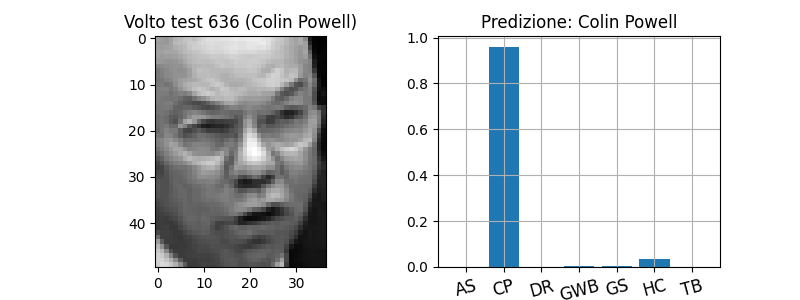

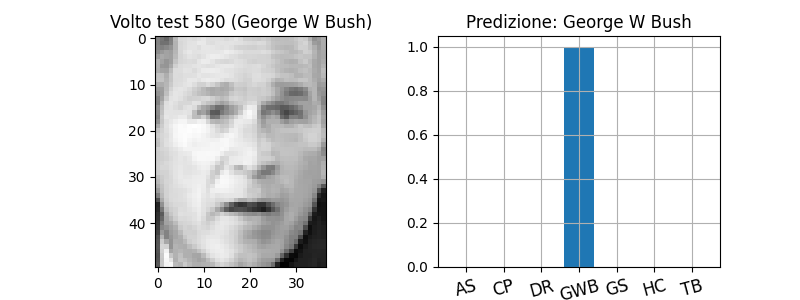

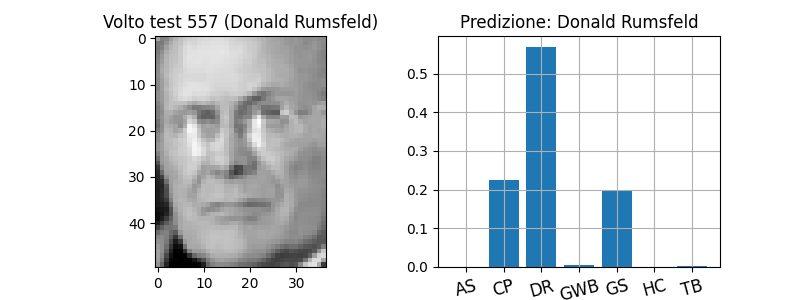

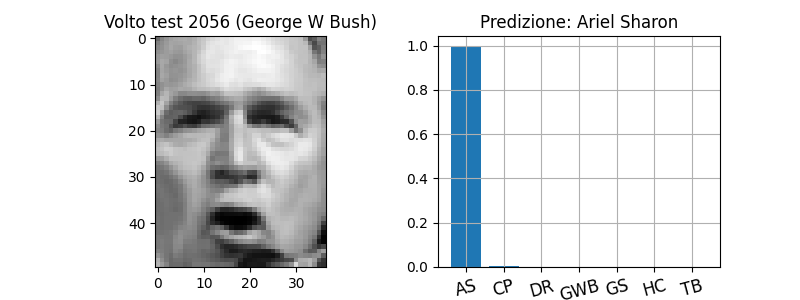

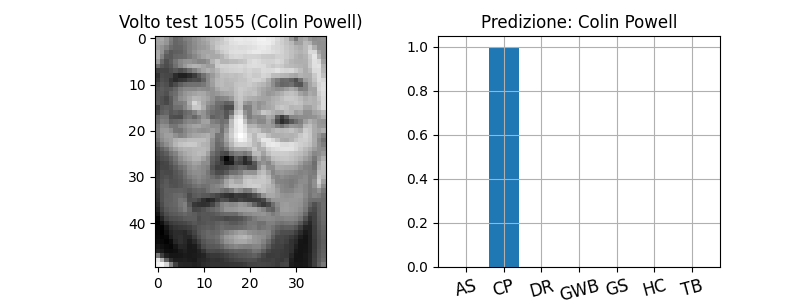

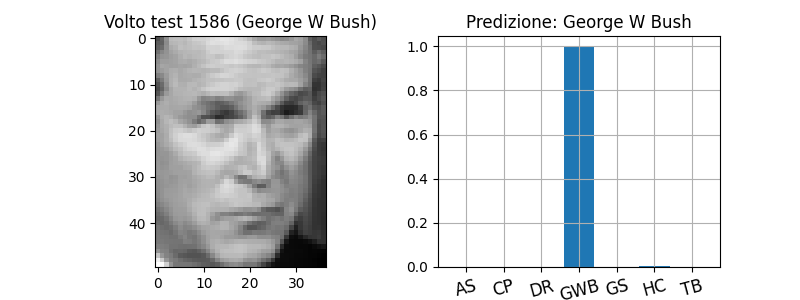

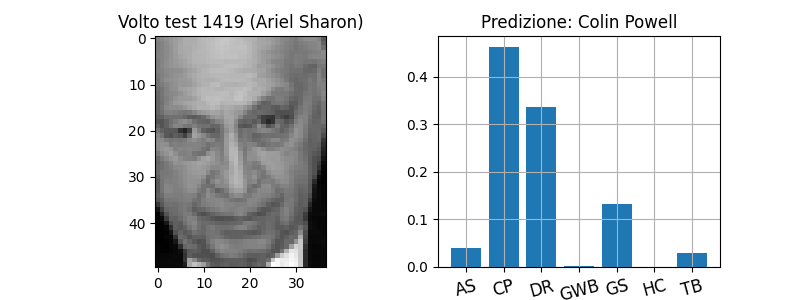

In [14]:
# Selezione di "n_randsamples" volti random dal dataset

# ... <-- COMPLETARE!


## Alcune Osservazioni sui Risultati

Il problema di riconoscimento volti non è stato risolto troppo bene dal MLP (e peggiora con il "bilanciamento" del dataset).

In entrambi i casi, si hanno chiaramente problemi di overfitting. Questo significa che, in assenza di maggiori dati, maggiori configurazioni per l'MLP andrebbero testate. Tuttavia, a causa dei limiti della classe _MLPClassifier_, non è garantito che si trovino dei buoni risultati.

**ALCUNE OSSERVAZIONI ULTERIORI:**
- Il caso con dataset "bilanciato" mostra una buona accuratezza/recall per Hugo Chavez, ma una bassa precisione (l'opposto del caso "sbilanciato"). Molto probabilmente questo è dovuto al fatto che abbiamo preso per il training la metà dei volti a disposizione per quella classe. Ma si deve anche ricordare che avevamo prima esteso il dataset raddoppiando il numero di volti presenti tramite riflessione. L'MLP potrebbe aver quindi "individuato" meglio Hugo Chavez perché nel training+validation e nel test set ci sono più o meno gli stessi volti, ma riflessi.
- In assenza di altre immagini e in presenza delle limitazioni della classe _MLPClassifier_ un possibile approccio al problema potrebbe essere quello di suddividerlo in più sottoproblemi di classificazione binaria (similmente alle SVM).
- In generale, con questo esempio, vediamo come le NN siano strumenti molto potenti ma altrettanto sensibili nella fase di addestramento. Per problemi con pochi dati e non eccessivamente grandi per dimensioni dello spazio, metodi classici di ML (come le SVM) rimangono degli strumenti più che validi.